# 💸 Daily Transactions Analysis Project

This project analyzes a dataset of **daily household financial transactions** to uncover insights about spending habits, income patterns, and budgeting behavior.

The dataset contains over 2,400 records of personal transactions, categorized by date, type (Income, Expense, Transfer), payment mode, and transaction category.

Through **data cleaning, exploratory analysis, and visualizations**, we aim to:
- Identify top spending areas
- Understand monthly and daily trends
- Calculate total and average income/expenses
- Gain actionable insights to improve money management

This project demonstrates how simple financial logs can reveal valuable patterns when analyzed with Python and pandas.


## 📂  Dataset Overview

The **"Daily Household Transactions"** dataset contains **2,461 transaction records** with the following columns:

| Column Name        | Description                                                                 |
|--------------------|-----------------------------------------------------------------------------|
| `Date`             | The date of each transaction (format: YYYY-MM-DD)                           |
| `Mode`             | The payment mode used (e.g., Cash, Bank Account, Credit Card)               |
| `Category`         | The main category of the transaction (e.g., Food, Transportation, Health)   |
| `Subcategory`      | A more specific subcategory (e.g., Grocery, Auto, Milk)                     |
| `Note`             | Additional details or descriptions for the transaction                      |
| `Amount`           | The amount spent or earned (in INR)                                         |
| `Income/Expense`   | Whether the transaction was an Income, Expense, or Transfer-Out             |
| `Currency`         | Currency used (all transactions are in INR)                                 |

🧾 This dataset is well-suited for:
- Budget and expense analysis
- Spending pattern detection
- Financial behavior insights



In [5]:
from google.colab import files
uploaded = files.upload()

Saving Daily Household Transactions.xlsx to Daily Household Transactions.xlsx


In [6]:
#imports the Pandas library, which is used for data analysis and manipulation
import pandas as pd
#eads your Excel file and loads it into a DataFrame named df,engine='openpyxl' is needed because your file is .xlsx, and this engine knows how to read it.
df = pd.read_excel("Daily Household Transactions.xlsx", engine='openpyxl')
df.head()


,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,2018-09-20 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,2018-09-20 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,2018-09-19 00:00:00,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,2018-09-17 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,2018-09-16 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [7]:
#column names, types, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            2461 non-null   datetime64[ns]
 1   Mode            2461 non-null   object        
 2   Category        2461 non-null   object        
 3   Subcategory     1826 non-null   object        
 4   Note            1940 non-null   object        
 5   Amount          2461 non-null   float64       
 6   Income/Expense  2461 non-null   object        
 7   Currency        2461 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 153.9+ KB


In [8]:
#last 5 rows (to check recent entries)
df.tail()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
2456,2015-01-01,Cash,Transportation,NaN,share jeep - Place T base to top,20.0,Expense,INR
2457,2015-01-01,Cash,Transportation,NaN,share auto - Place H to Place T base,20.0,Expense,INR
2458,2015-01-01,Cash,Transportation,NaN,bus - brc to Place H,30.0,Expense,INR
2459,2015-01-01,Cash,Food,NaN,tea,10.0,Expense,INR
2460,2015-01-01,Cash,Transportation,NaN,share auto - hospital to brc station,10.0,Expense,INR


In [9]:
#Step 3: Check for Missing Data
#Let's find out where data is missing so we can clean or handle it later:
df.isnull().sum()


,0
Date,0
Mode,0
Category,0
Subcategory,635
Note,521
Amount,0
Income/Expense,0
Currency,0


In [10]:
#Basic Summary Stats
df.describe()


,Date,Amount
count,2461,2461.000000
mean,2017-04-04 01:09:55.857781504,2751.145380
min,2015-01-01 00:00:00,2.000000
25%,2016-10-22 20:23:46,35.000000
50%,2017-06-25 13:38:59,100.000000
75%,2018-01-15 16:55:27,799.000000
max,2018-09-20 12:04:08,250000.000000
std,NaN,12519.615804


In [16]:
#6.1. Check Distribution of Income vs Expense
# Count the number of income and expense transactions
df['Income/Expense'].value_counts()


,count
Income/Expense,
Expense,2176
Transfer-Out,160
Income,125


In [17]:
#6.2. Breakdown by Mode of Payment
# Count how many times each payment mode was used
df['Mode'].value_counts()

,count
Mode,
Saving Bank account 1,1223
Cash,1046
Credit Card,162
Equity Mutual Fund B,11
Share Market Trading,5
Saving Bank account 2,5
Recurring Deposit,3
Debit Card,2
Equity Mutual Fund C,1


In [18]:
# 6.3. Total Income and Total Expense
# This line filters all income transactions, selects their amounts, and adds them up to calculate the total income.
# Filter rows where transaction is income
total_income = df[df['Income/Expense'] == 'Income']['Amount'].sum()
# Filter rows where transaction is expense
total_expense = df[df['Income/Expense'] == 'Expense']['Amount'].sum()
# Print results
#f in front of the string is called an f-string,It lets you insert the value of variables directly inside a string using curly braces {}.
print(f"Total Income: ₹{total_income}")
print(f"Total Expense: ₹{total_expense}")


Total Income: ₹3042397.3499999996
Total Expense: ₹1957390.53


In [19]:
#6.4. Top Spending Categories
# Step 1: Filter only the rows where the transaction is an 'Expense'
only_expenses = df[df['Income/Expense'] == 'Expense']

# Step 2: Group the filtered data by the 'Category' column
# and sum up the 'Amount' spent in each category
expense_by_category = only_expenses.groupby('Category')['Amount'].sum()

# Step 3: Sort the categories by total amount spent, from highest to lowest
expense_by_category = expense_by_category.sort_values(ascending=False)

# Step 4: Display the top 5 categories where the most money was spent
expense_by_category.head()

,Amount
Category,
Money transfer,606528.90
Investment,271858.00
Transportation,169053.78
Household,161645.58
subscription,114587.91


In [20]:
 #6.5. Average Spend per Transaction:.2f	Format as a floating point number with 2 decimal places (like ₹1234.56)
 avg_expense = df[df['Income/Expense'] == 'Expense']['Amount'].mean()
print(f"Average Expense per transaction: ₹{avg_expense:.2f}")

Average Expense per transaction: ₹899.54


In [21]:
# necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style to make charts look cleaner
sns.set(style="whitegrid")

In [22]:
#7.1. Income vs Expense Pie Chart
#  Calculate total income
# We filter the DataFrame to only rows where 'Income/Expense' is 'Income'
# Then we take the 'Amount' column and sum it up
income = df[df['Income/Expense'] == 'Income']['Amount'].sum()

# 3 Calculate total expense similarly
expense = df[df['Income/Expense'] == 'Expense']['Amount'].sum()


In [23]:
# 4 Prepare the data to be shown in the pie chart
labels = ['Income', 'Expense']  # Names of each section in the pie chart
values = [income, expense]      # Corresponding values for each label
colors = ['#8BC34A', '#F44336'] # Green for income, red for expense

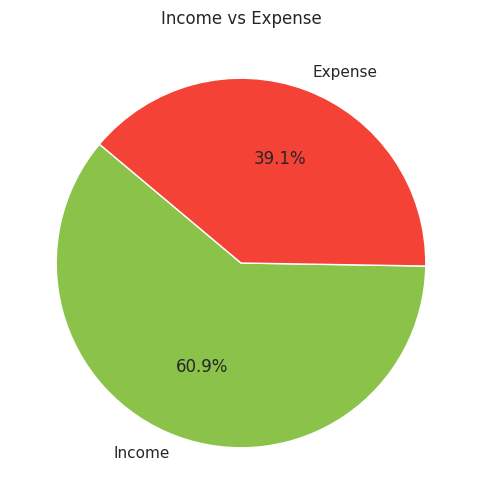

In [24]:
# 5 Create the pie chart
plt.figure(figsize=(6,6))  # Set the size of the chart

# Plot the pie chart with the values and labels
# autopct='%1.1f%%' shows percentage values on the chart like "66.7%"
# startangle=140 rotates the pie chart to make it look better
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add a title to the pie chart
plt.title('Income vs Expense')

# Finally, show the chart
plt.show()


In [25]:
#7.2. Top 5 Expense Categories – Bar Chart
# 1Filter only the rows where the transaction is an Expense
expense_df = df[df['Income/Expense'] == 'Expense']
# 2️⃣ Group these expense rows by Category
# Then, sum up the 'Amount' column for each category
expense_by_category = expense_df.groupby('Category')['Amount'].sum()
# 3️⃣ Sort the result so the highest spending categories come first
expense_by_category = expense_by_category.sort_values(ascending=False)
# 4️⃣ Select the top 5 categories where you spent the most
top5 = expense_by_category.head()


/tmp/ipython-input-26-1774115157.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5.values, y=top5.index, palette='flare')  # x = amounts, y = category names


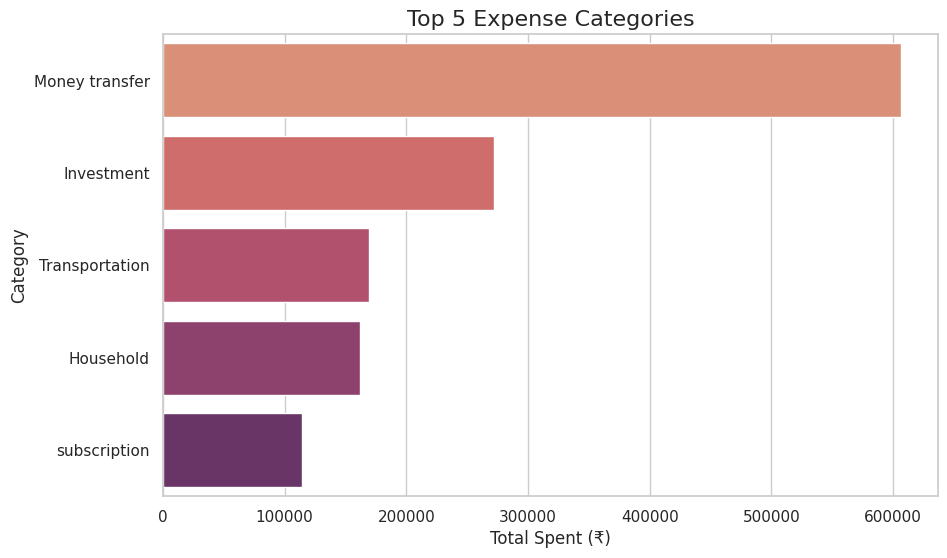

In [26]:
# 5️⃣ Create the bar plot (we're using seaborn for a prettier style)
plt.figure(figsize=(10, 6))  # Set the width and height of the plot

sns.barplot(x=top5.values, y=top5.index, palette='flare')  # x = amounts, y = category names

# 6️⃣ Add title and axis labels
plt.title('Top 5 Expense Categories', fontsize=16)
plt.xlabel('Total Spent (₹)', fontsize=12)
plt.ylabel('Category', fontsize=12)

# 7️⃣ Show the plot
plt.show()


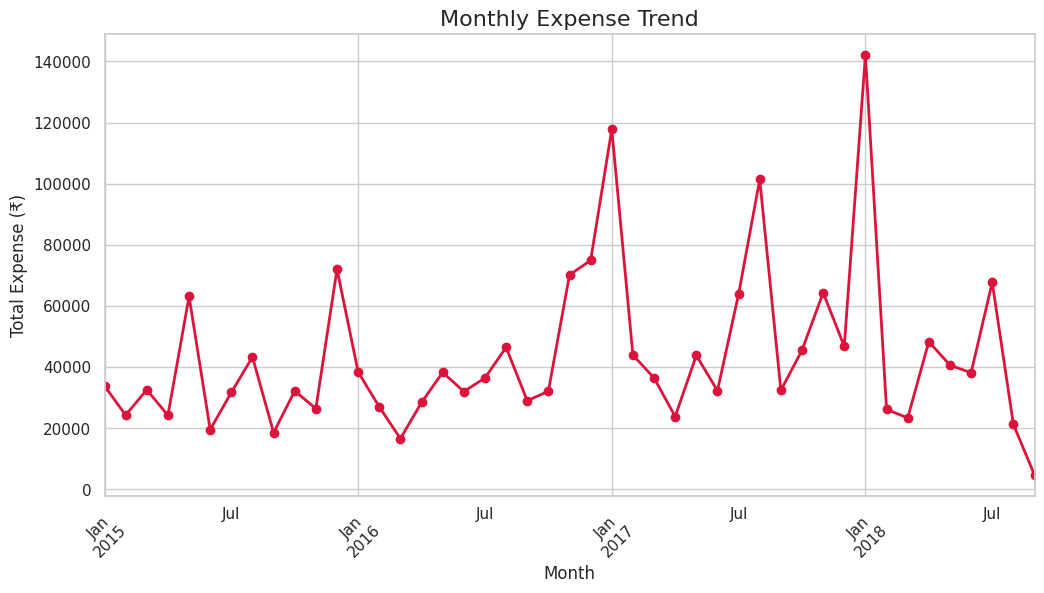

In [28]:
#7.3. Monthly Spending – Line Graph
# 1️⃣ Convert the 'Date' column to datetime format (if not already)
df['Date'] = pd.to_datetime(df['Date'])
# 2️⃣ Create a new column for Month-Year (like "2024-01", "2024-02")
df['Month'] = df['Date'].dt.to_period('M')
# 3️⃣ Filter only the Expense transactions
expense_df = df[df['Income/Expense'] == 'Expense']
# 4️⃣ Group expenses by Month and sum the 'Amount'
monthly_expense = expense_df.groupby('Month')['Amount'].sum()
# 5️⃣ Plot the monthly expenses
plt.figure(figsize=(12, 6))  # Set the figure size

# Plotting line graph
monthly_expense.plot(kind='line', marker='o', color='crimson', linewidth=2)

# Add labels and title
plt.title('Monthly Expense Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Expense (₹)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()


In [29]:
# 7.4. Monthly Income vs Expense – Grouped Bar Chart
# 1️⃣ Ensure 'Date' column is in datetime format (already done)
df['Date'] = pd.to_datetime(df['Date'])

# 2️⃣ Extract Month-Year as a new column
df['Month'] = df['Date'].dt.to_period('M')

# 3️⃣ Group by Month AND Income/Expense, then sum the Amount
monthly_summary = df.groupby(['Month', 'Income/Expense'])['Amount'].sum().unstack()

# This will give a table like:
# Month     Expense   Income
# 2024-01     5000      8000
# 2024-02     6200      7200


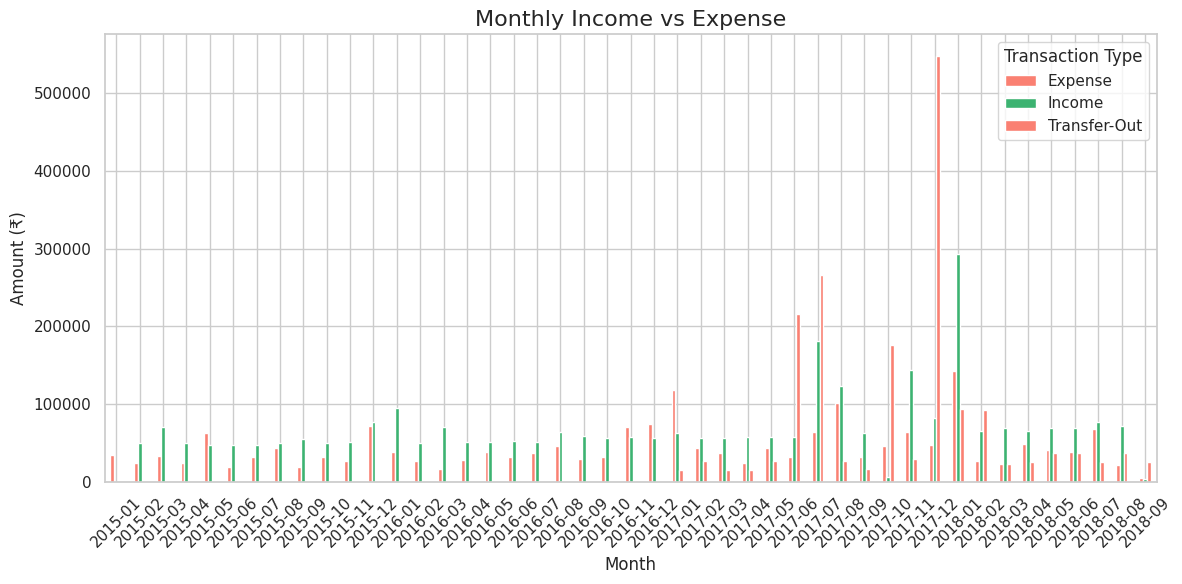

In [30]:
# 4️⃣ Plotting the grouped bar chart
monthly_summary.plot(kind='bar', figsize=(12, 6), color=['salmon', 'mediumseagreen'])

# 5️⃣ Add labels and formatting
plt.title('Monthly Income vs Expense', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Amount (₹)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Transaction Type')
plt.grid(True, axis='y')

# 6️⃣ Show plot
plt.tight_layout()
plt.show()


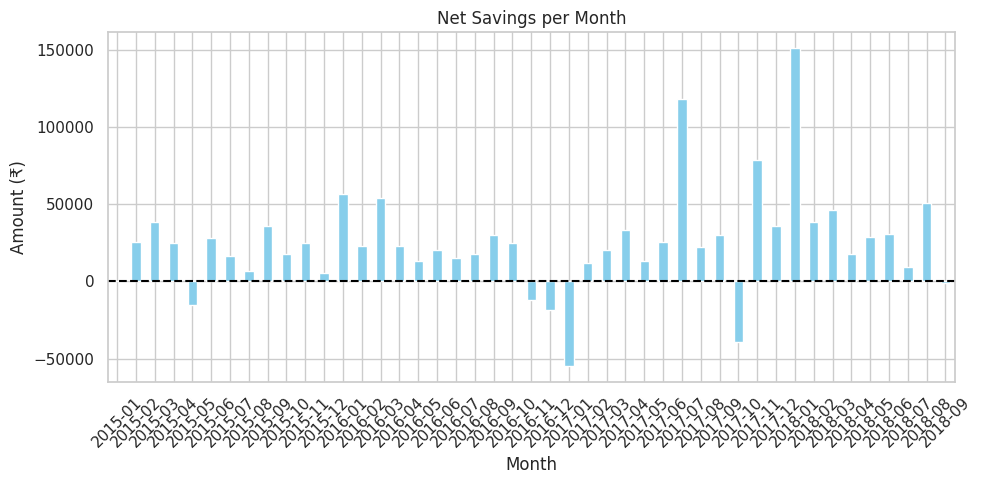

In [31]:
#8.1. Net Monthly Savings (Bar Plot)
# Calculate net savings per month
monthly_summary['Savings'] = monthly_summary['Income'] - monthly_summary['Expense']

# Plot savings
monthly_summary['Savings'].plot(kind='bar', color='skyblue', figsize=(10, 5))
plt.title('Net Savings per Month')
plt.xlabel('Month')
plt.ylabel('Amount (₹)')
plt.axhline(0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


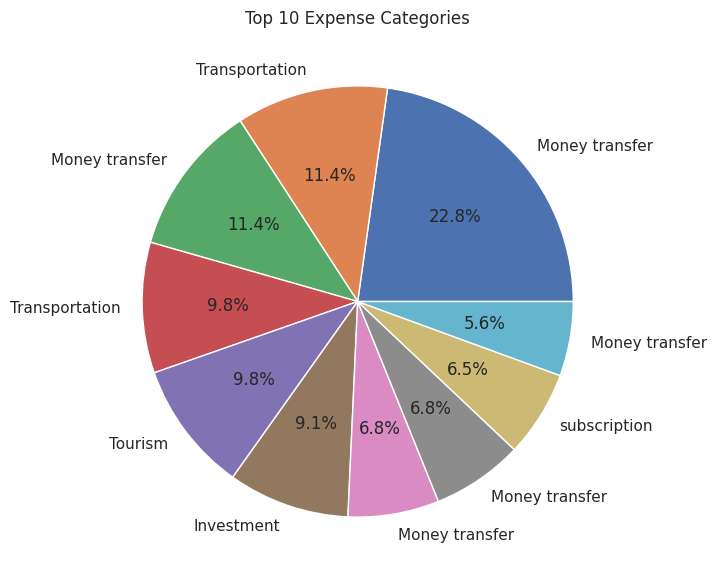

In [34]:
# 8.2. Top 10 Largest Expenses
top_expenses = df[df['Income/Expense'] == 'Expense'].sort_values(by='Amount', ascending=False).head(10)
top_expenses[['Date', 'Category', 'Amount']]
top_expenses.set_index('Category')['Amount'].plot.pie(autopct='%1.1f%%', figsize=(7, 7))
plt.title("Top 10 Expense Categories")
plt.ylabel('')
plt.show()


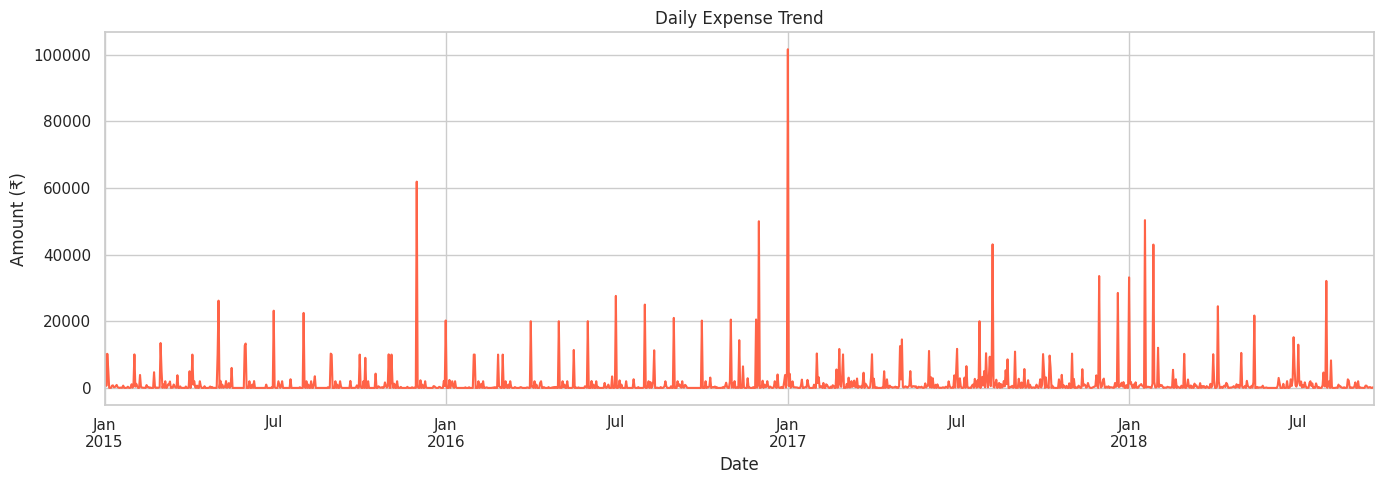

In [35]:
#8.3. Daily Spending Pattern
# Resample by day and plot
daily_expense = df[df['Income/Expense'] == 'Expense'].set_index('Date')['Amount'].resample('D').sum()

daily_expense.plot(figsize=(14, 5), color='tomato')
plt.title('Daily Expense Trend')
plt.xlabel('Date')
plt.ylabel('Amount (₹)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [37]:
# Filter only 'Expense' transactions and get the mean of their Amount
avg_expense = df[df['Income/Expense'] == 'Expense']['Amount'].mean()

# Print with formatting up to 2 decimal places
print(f"💸 Average Expense per transaction: ₹{avg_expense:.2f}")


💸 Average Expense per transaction: ₹899.54


In [39]:
## 📋 Summary Report: Household Financial Analysis

#- Total number of transactions: 2461
#- Total Income: ₹3042397.3499999996
#- Total Expense: ₹1957390.53


### 📊 Insights

#- 🥇 **Top spending category**: Money Transfer — most money was spent here.
# 💳 **Most used payment method**: Saving Bank account 1.
#- 📉 **Average Expense per transaction**:  ₹899.54
#- 🧾 **Money Transfer** and **transportation** were the most frequent repeat expenses.


